Sentence Similarity is the task of determining how similar two texts are.<br>
This task is particularly useful for information retrieval and clustering/grouping.

Sentence similarity models convert input texts into vectors (embeddings) that capture semantic information and calculate how close (similar) they are between them.

[Reference](https://huggingface.co/tasks/sentence-similarity)

Semantic Textual Similarity (STS) is a natural language processing (NLP) task that focuses on determining the degree of similarity or relatedness between two text passages based on their meaning. In other words, it assesses how closely related or similar two pieces of text are in terms of the information they convey, rather than just looking at the superficial similarity based on word overlap or character matching.

[STSBenchmark](http://ixa2.si.ehu.eus/stswiki/index.php/STSbenchmark)

To measure semantic textual similarity, NLP models and algorithms typically rely on machine learning and deep learning techniques. They take into account various linguistic and contextual features, such as word embeddings, syntactic structures, and semantic representations, to compute a similarity score between the two text passages. Common methods for STS include using Siamese neural networks, pre-trained word embeddings (e.g., Word2Vec, GloVe), and more advanced models like BERT or RoBERTa to extract semantic information from text.

The output of STS models is typically a numerical score that indicates the degree of similarity, with higher scores indicating greater similarity and lower scores indicating less similarity. These scores can be used to rank or classify text pairs in various NLP applications.


In below notebook we will be using sentence-transformer libary provided by Hugging Face to solve the similarity problem, This is the SOTA soloution available for measuring semantic textual similarity.



*   Install sentence-transformers from Python package Installer



In [1]:
!pip install -U sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 126.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=560345460ca0bff89dc05f2f90ba88c61543fb823f99a35ba6fefa62cbb32b73
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


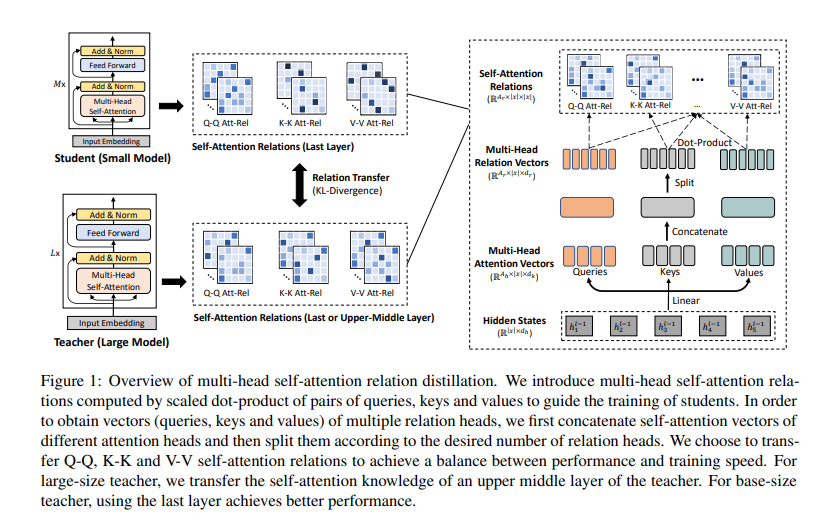

Useful Links:

[MINILMv2: Multi-Head Self-Attention Relation Distillation
for Compressing Pretrained Transformers](https://arxiv.org/pdf/2012.15828.pdf)

[MiniLM github](https://github.com/microsoft/unilm/tree/master/minilm)

[MiniLM Hugging Face](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)

In [2]:
#Download Dataset
!wget https://raw.githubusercontent.com/YogJoshi14/Sentence_Similarity/main/Precily_Task/Precily_Text_Similarity.csv

--2023-10-12 06:20:25--  https://raw.githubusercontent.com/YogJoshi14/Sentence_Similarity/main/Precily_Task/Precily_Text_Similarity.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13794662 (13M) [text/plain]
Saving to: ‘Precily_Text_Similarity.csv’

Precily_Text_Simila 100%[===================>]  13.16M  --.-KB/s    in 0.1s    

2023-10-12 06:20:25 (115 MB/s) - ‘Precily_Text_Similarity.csv’ saved [13794662/13794662]



In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('Precily_Text_Similarity.csv')
df.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


In [ ]:

from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

similarity_scores = []
for index, row in df.iterrows():
    print(index,"of",len(df))

    #Compute embedding for both lists
    embedding_1= model.encode(row['text1'], convert_to_tensor=True)
    embedding_2 = model.encode(row['text2'], convert_to_tensor=True)

    score = util.pytorch_cos_sim(embedding_1, embedding_2).item()
    similarity_scores.append(score)


In [22]:
df.to_csv("dataset_results.csv",index=False)